# Extraindo as Letras da Discografia da Ally Brooke

Allyson Brooke Hernandez (San Antonio, 7 de julho de 1993) é uma cantora e compositora mexicana-americana. Foi membro do grupo feminino Fifth Harmony, formado na segunda temporada de *The X Factor US* em 2012. Ela lançou seu single de estreia solo *Low Key*, com o rapper Tyga em 31 de janeiro de 2019.Está atualmente trabalhando em seu primeiro álbum de estúdio solo com a gravadora *Atlantic Records*. Ally, estudou até a quarta série e se mudou temporariamente para Atlanta para gravar comerciais infantis. Em 2020, lançou seu single *500 Veces* em parceria com o Messiah que conta atualmente com 10 milhões de visualizações no YouTube.

Mais informações no link: https://pt.wikipedia.org/wiki/Ally_Brooke

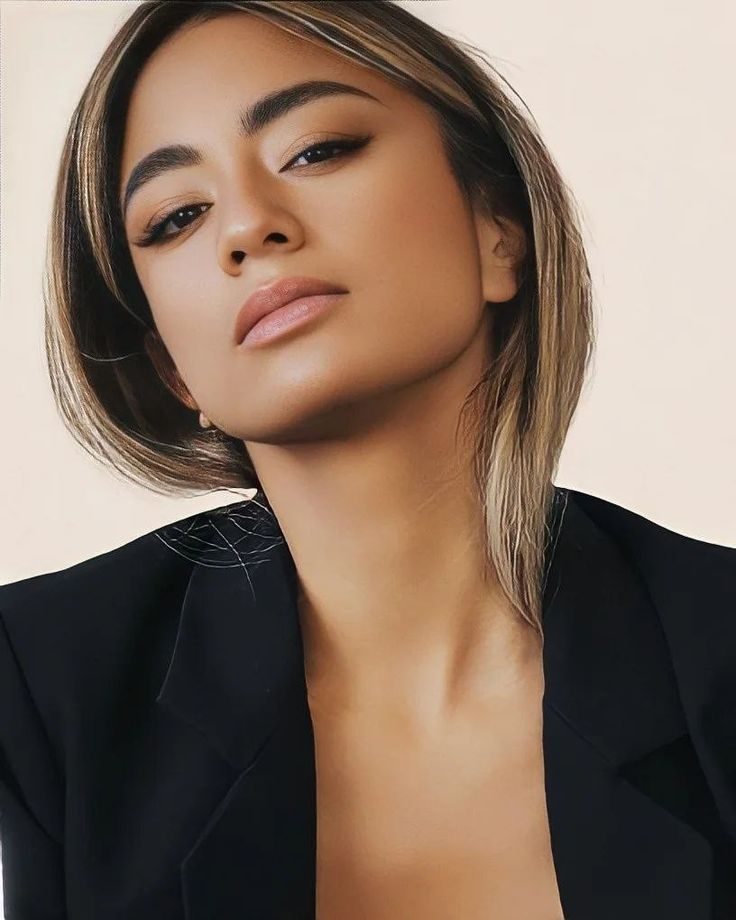

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

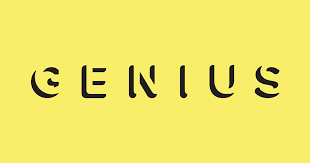

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Ally Brooke", max_songs=40)

Searching for songs by Ally Brooke...

Song 1: "Low Key"
Song 2: "Lips Don’t Lie"
Song 3: "No Good"
Song 4: "Higher"
Song 5: "500 Veces"
Song 6: "Fabulous"
Song 7: "Cake"
"Magic" is not valid. Skipping.
Song 8: "The Truth Is In There"
Song 9: "All Right There"
Song 10: "What Are We Waiting For?"
Song 11: "Mi Música"
Song 12: "Tequila"
Song 13: "Last Christmas"
Song 14: "Por Ti"
Song 15: "Boy Like You"
Song 16: "Baby I’m Coming Home"
Song 17: "Gone to Bed"
Song 18: "Somebody That I Used to Know"
Song 19: "Lips Don’t Lie (R3HAB Remix)"
Song 20: "Touch"
Song 21: "Cupid"
Song 22: "Hay Una*"
Song 23: "Under The Tree"
Song 24: "Ya Supérame"
"Perfect" is not valid. Skipping.
Song 25: "Started With a Kiss*"
Song 26: "Lips Don’t Lie (Stripped)"
Song 27: "Low Key (MK Remix)"
Song 28: "Have Yourself a Merry Little Christmas"
Song 29: "Have Yourself A Merry Little Christmas"
Song 30: "Be You"
Song 31: "Busted"
Song 32: "Higher - Tropkillaz Remix"
Song 33: "On My Knees"
Song 34: "Instant Message"
S

In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_AllyBrooke.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_AllyBrooke.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'iq', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[8, 14, 18, 19, 20, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,release_year
0,Low Key,"[Intro: Ally Brooke]\nOh, yeah\n\n[Chorus: All...",2019-01-31,2019
1,Lips Don’t Lie,"[Intro: A Boogie wit da Hoodie]\nYeah, yeah\nU...",2019-05-24,2019
2,No Good,[Intro]\nYou're no good for me\nI don't need n...,2019-11-25,2019
3,Higher,"[Verse 1]\nOh, the wind has been singing me a ...",2019-09-16,2019
4,500 Veces,[Intro: Ally Brooke & Messiah]\nAlly Brooke\nM...,2020-07-17,2020
5,Fabulous,"[Intro]\nOoh, ooh, ooh\n\n[Verse 1]\nNobody's ...",2020-02-28,2020
6,Cake,[Verse 1]:\nNothin' but distortion in my head\...,2011-01-01,2011
7,The Truth Is In There,"[Verse 1]\nIt's undeniable, but we can see\nTh...",2018-12-21,2018
8,What Are We Waiting For?,[Verse 1]\nHad no plans to show up (Ah-ah-ah)\...,2020-10-16,2020
9,Mi Música,"[Letra de ""Mi Música""]\n\n[Intro]\nOoh-ooh\nHm...",2021-10-22,2021


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("AllyBrookeLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('AllyBrooke.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Low Key',
  ' ally brooke yeah  ally brooke really know really know yeah know things could show really know  ally brooke looking body closely there things know could take fast take slowly could ibiza cozy  ally brooke friends looking they know cause left slipped back  ally brooke really know really know yeah know things could show really know  ally brooke forget phones morning morning post gets story take places then rest guess self explanatory  ally brooke friends looking they know cause left slipped back  ally brooke really know know really know yeah know things could show really know post  ally brooke  tyga ally brooke yeah watchin plottin yeah neck freeze body yeah known givin yeah spend yeah invent wave invent baguettes wrist actin timid take mexico nobody business yeah throw that ally dunk slam looking love minute serve plate come love like litty  ally brooke really know really know know yeah know things could show yeah yeah really know really know post  ally brooke',
  '2019-